In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
project_path = str(Path().joinpath('..', 'triple_agent').resolve())
sys.path.append(project_path)
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.replays.get_parsed_replays import get_parsed_replays
from triple_agent.utilities.event_constants import SCL5_DROPPED_PLAYERS, SCL5_DIVISIONS, select_scl5
from triple_agent.reports.action_tests import action_test_percentages, diff_action_test_percentages
from triple_agent.utilities.action_tests import ActionTest

In [15]:
scl5_replays = get_parsed_replays(select_scl5)

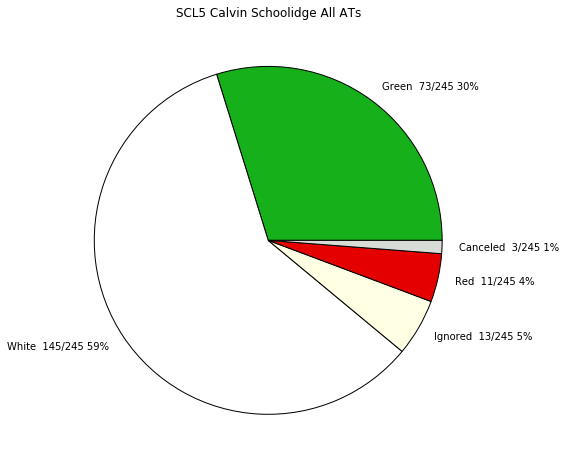

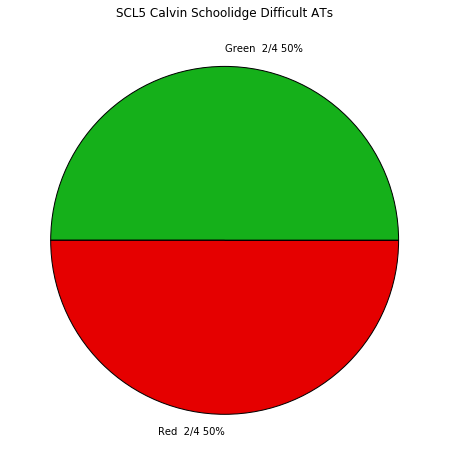

In [16]:
spy = 'Calvin Schoolidge'
individual_replays = list(filter(lambda g: g.spy == spy, scl5_replays))
action_test_percentages(
    individual_replays,
    f'SCL5 {spy} All ATs',
)
diff_action_test_percentages(
    individual_replays,
    f'SCL5 {spy} Difficult ATs',
)

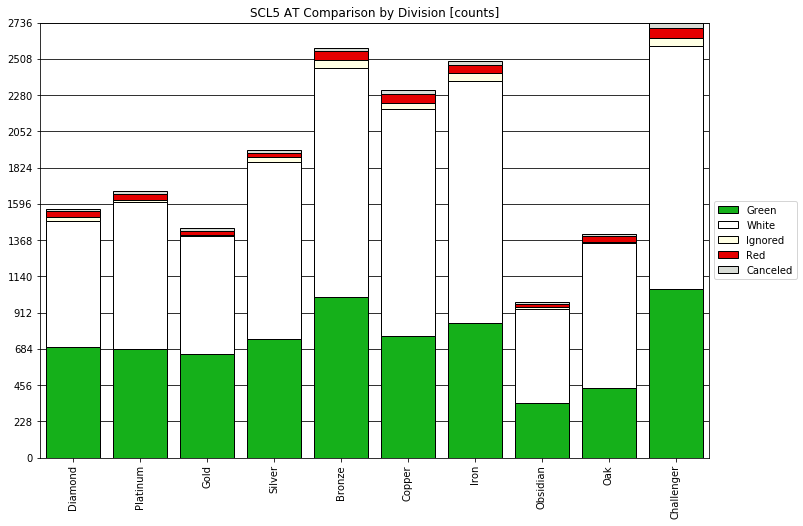

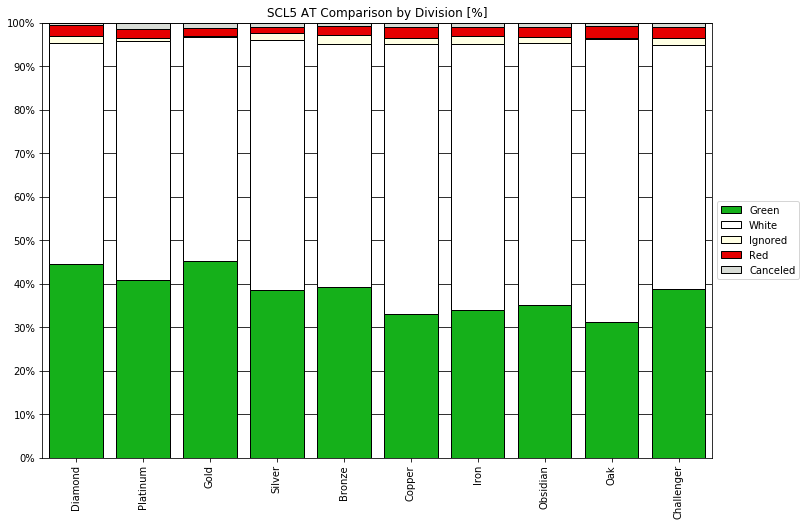

In [17]:
action_test_percentages(
    scl5_replays,
    'SCL5 AT Comparison by Division',
    groupby=lambda g: g.division,
    category_name_order=lambda s: SCL5_DIVISIONS.index(s),
)

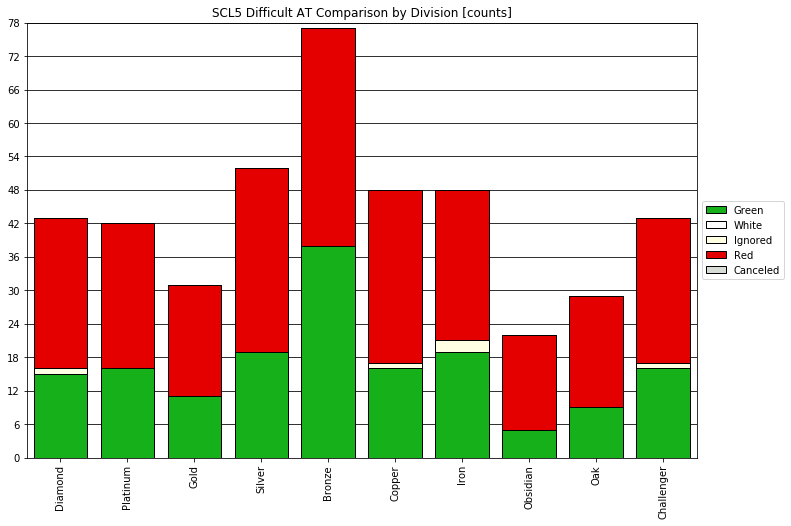

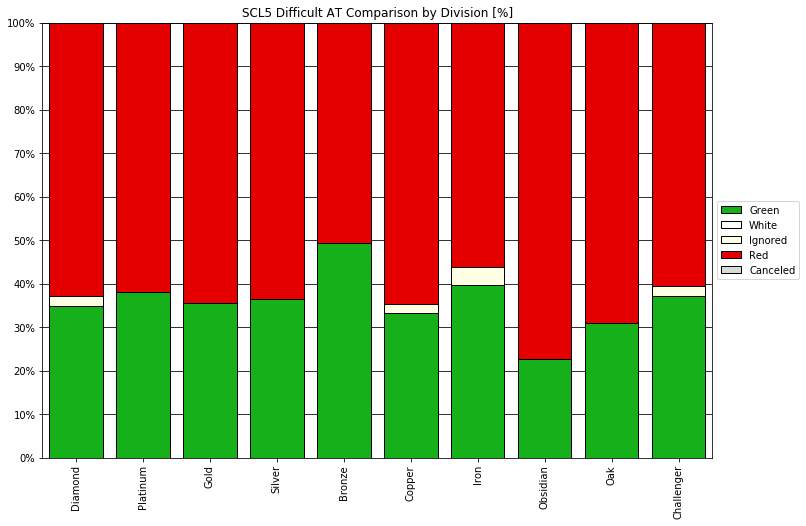

In [18]:
diff_action_test_percentages(
    scl5_replays,
    'SCL5 Difficult AT Comparison by Division',
    groupby=lambda g: g.division,
    category_name_order=lambda s: SCL5_DIVISIONS.index(s),
)

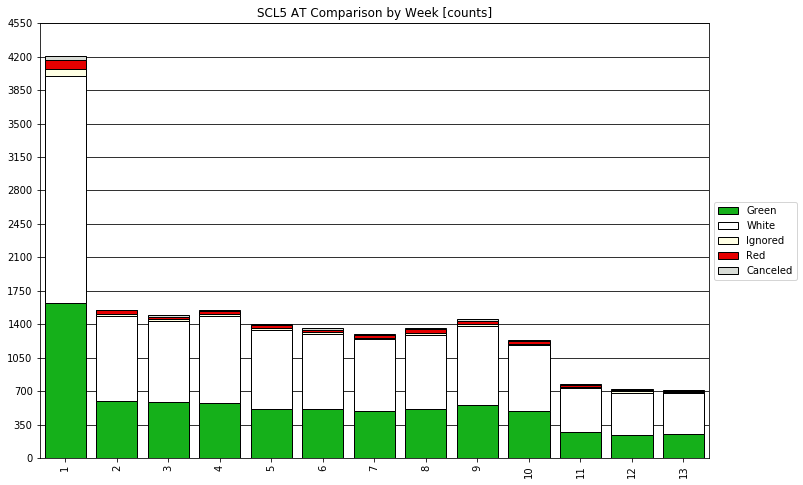

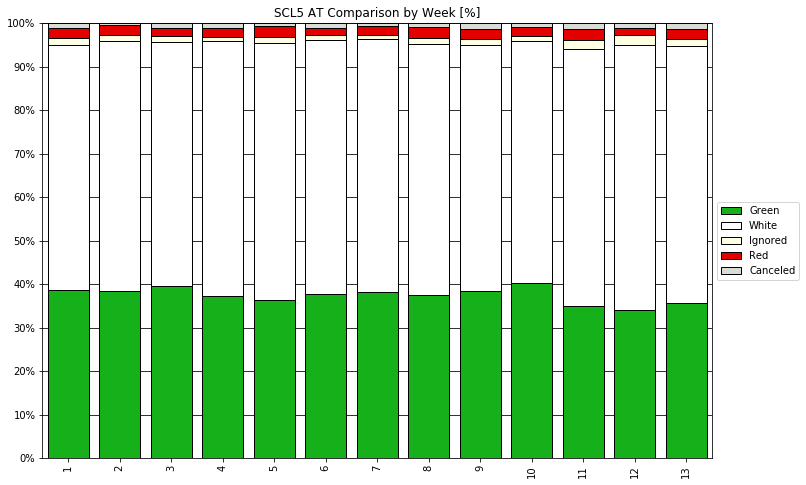

In [19]:
action_test_percentages(
    scl5_replays,
    'SCL5 AT Comparison by Week',
    groupby=lambda g: g.week,
)

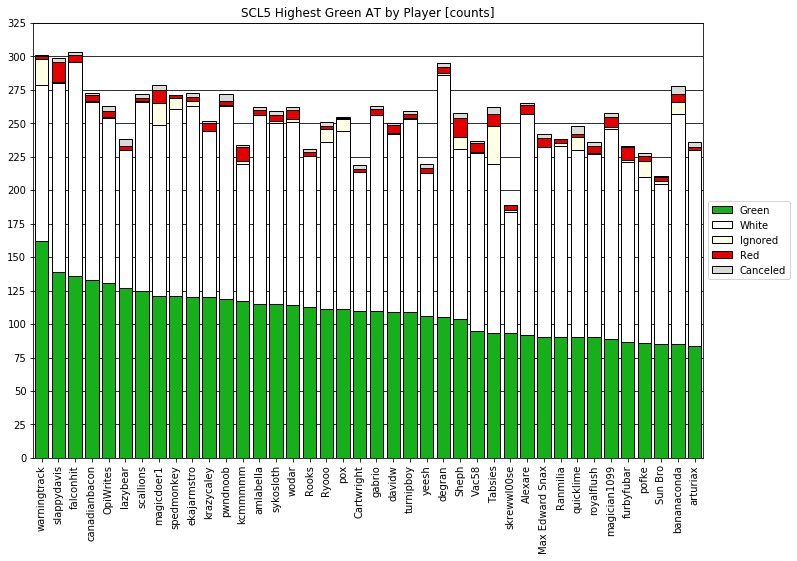

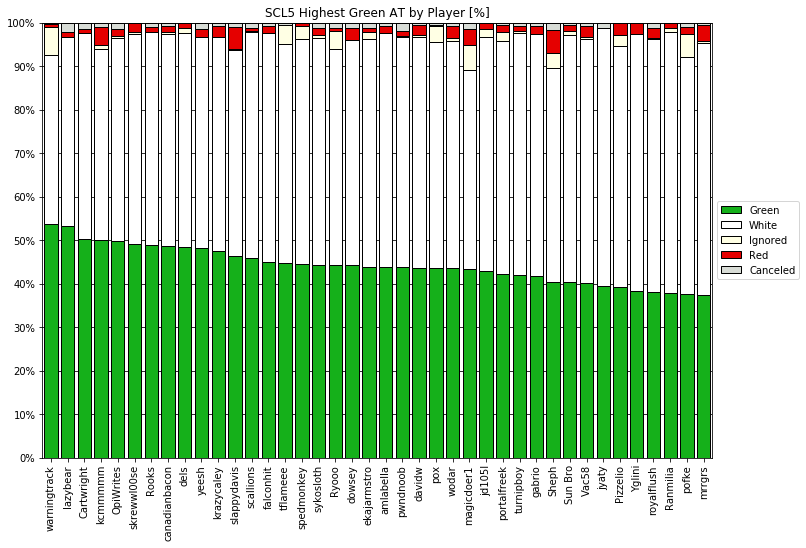

In [29]:
action_test_percentages(
    scl5_replays,
    'SCL5 Highest Green AT by Player',
    groupby=lambda g: g.spy,
    category_data_order=ActionTest.Green,
    limit=40
)

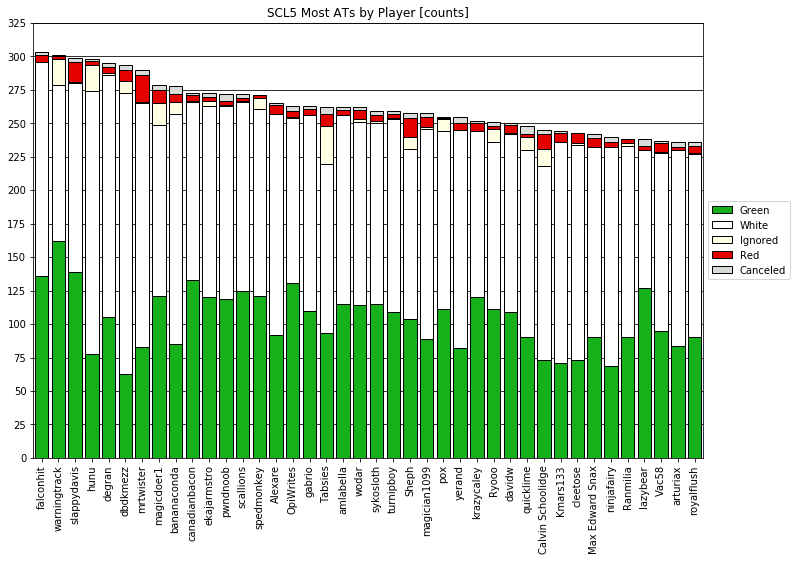

In [25]:
action_test_percentages(
    scl5_replays,
    'SCL5 Most ATs by Player',
    groupby=lambda g: g.spy,
    category_data_order=sum,
    limit=40,
    percentile_plot=False
)

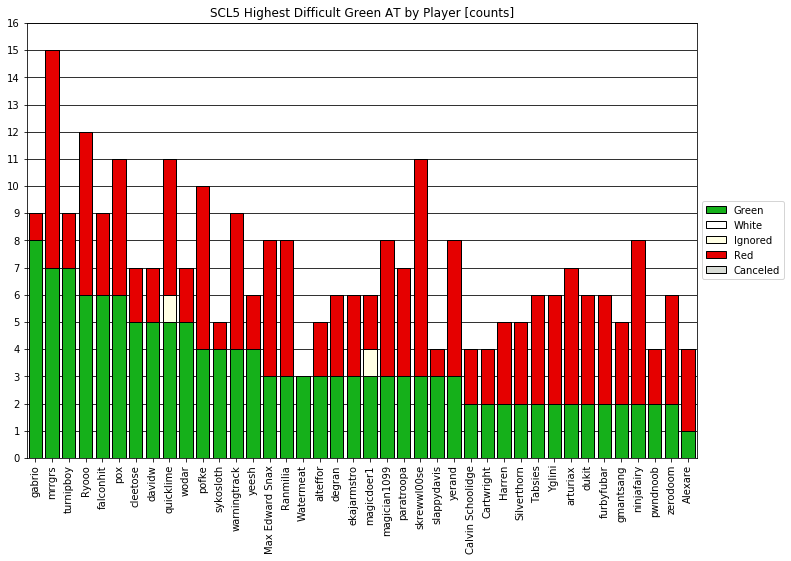

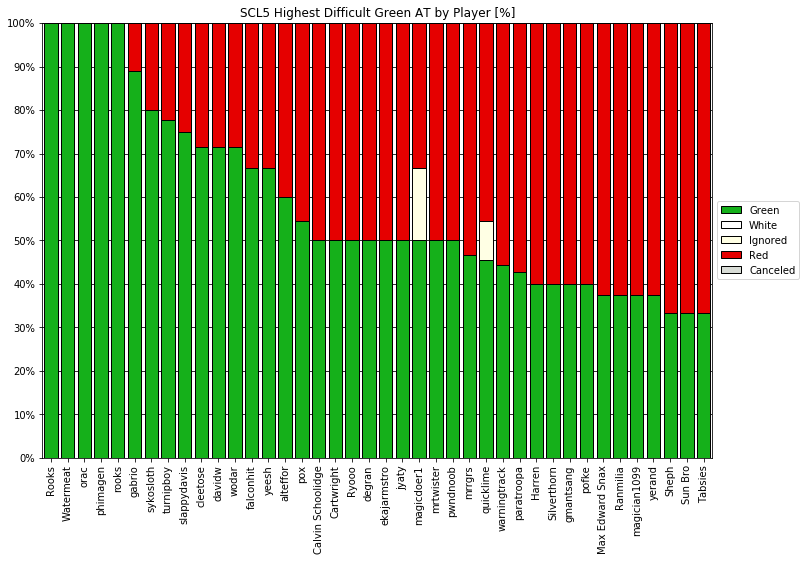

In [26]:
diff_action_test_percentages(
    scl5_replays,
    'SCL5 Highest Difficult Green AT by Player',
    groupby=lambda g: g.spy,
    category_data_order=ActionTest.Green,
    limit=40
)

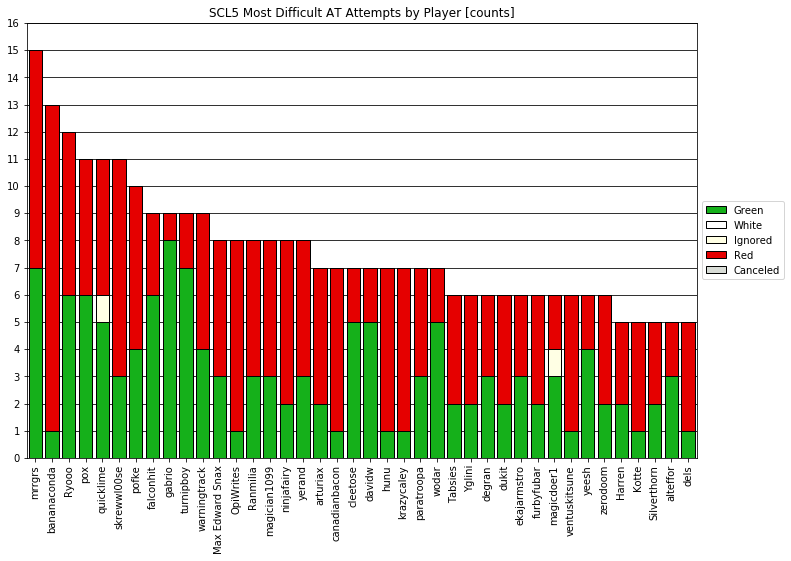

In [30]:
diff_action_test_percentages(
    scl5_replays,
    'SCL5 Most Difficult AT Attempts by Player',
    groupby=lambda g: g.spy,
    category_data_order=sum,
    limit=40,
    percentile_plot=False
)